In [1]:
import numpy as np

from ruins.core import build_config
from ruins.plotting import monthlyx

In [2]:
config, dataManager = build_config()

In [3]:
vari = 'Tmax'
afu = np.max
datarng1 = (2050, 2070)
datarng2 = (2050, 2070)
# load data
cordex = dataManager['cordex_coast'].read()

data1 = cordex.filter_by_attrs(RCP='rcp45')
data2 = cordex.filter_by_attrs(RCP='rcp85')

dyp = data1.sel(vars=vari).to_dataframe().resample('1M').apply(afu)
dyp = dyp.loc[(dyp.index.year>=datarng1[0]) & (dyp.index.year<datarng1[1]),dyp.columns[dyp.columns!='vars']]
dyp2 = data2.sel(vars=vari).to_dataframe().resample('1M').apply(afu)
dyp2 = dyp2.loc[(dyp2.index.year >= datarng2[0]) & (dyp2.index.year < datarng2[1]),dyp2.columns[dyp2.columns!='vars']]

2022-04-17 09:13:45.187 INFO    numexpr.utils: Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-04-17 09:13:45.188 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


<ipython-input-4-9c2716088537>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


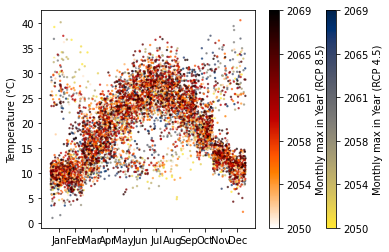

In [4]:
fig = monthlyx(dyp, dyp2, 'Temperature (°C)', 'Monthly max in Year (RCP 4.5)', 'Monthly max in Year (RCP 8.5)')
fig.show()

In [5]:
dyp

,CLMcom.CERFACS-CNRM-CM5.CCLM4-8-17.r1i1p1.rcp45,CLMcom.EC-EARTH.CCLM4-8-17.r12i1p1.rcp45,CLMcom.HadGEM2-ES.CCLM4-8-17.r1i1p1.rcp45,CLMcom.M-MPI-ESM-LR.CCLM4-8-17.r1i1p1.rcp45,DMI.EC-EARTH.HIRHAM5.r3i1p1.rcp45,DMI.NorESM1-M.HIRHAM5.r1i1p1.rcp45,KNMI.CERFACS-CNRM-CM5.RACMO22E.r1i1p1.rcp45,KNMI.EC-EARTH.RACMO22E.r12i1p1.rcp45,KNMI.EC-EARTH.RACMO22E.r1i1p1.rcp45,KNMI.HadGEM2-ES.RACMO22E.r1i1p1.rcp45,MPI-CSC.M-MPI-ESM-LR.REMO2009.r1i1p1.rcp45,MPI-CSC.M-MPI-ESM-LR.REMO2009.r2i1p1.rcp45
time,,,,,,,,,,,,
2050-01-31,7.383331,10.992401,39.291626,10.945679,10.210083,10.620117,7.391144,12.524750,9.336609,30.330017,9.974701,9.901031
2050-02-28,8.828094,9.471558,36.722687,9.235260,11.470459,13.670380,9.794922,12.822296,6.738495,31.836853,8.504791,9.043060
2050-03-31,9.796021,12.476868,34.195068,15.199036,15.482635,18.360138,11.342102,14.820892,15.935883,22.148468,15.466156,13.127289
2050-04-30,17.001007,18.956757,22.718445,25.066010,20.445984,22.431305,15.435425,22.034668,21.499878,24.769379,20.906128,20.413574
2050-05-31,17.998199,24.404938,21.945068,18.891296,19.761383,27.169525,15.771088,22.803833,20.113617,20.667786,22.766357,18.734955
...,...,...,...,...,...,...,...,...,...,...,...,...
2069-08-31,31.366852,28.145782,30.297607,25.083466,23.521973,23.072571,27.868744,28.238159,28.190674,28.232941,23.049164,19.441803
2069-09-30,30.279572,26.688690,30.111694,27.529144,22.379120,15.664520,27.294281,26.675446,21.525360,20.289551,25.160614,20.879120
2069-10-31,16.213715,23.086700,29.919678,19.881989,22.750458,14.693298,18.645416,22.489532,15.568695,23.163971,20.459869,16.087708


In [6]:
dyp.index.map(lambda x: x.year)
dyp.index.map(lambda x: x.strftime('%B'))

#dyp['year'] = dyp.index.map(lambda x: x.year)
grp = dyp.groupby(dyp.index.map(lambda x: x.strftime('%B')))

In [7]:
import plotly.graph_objects as go 


dimensions = {l: dict() for l in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
cmap = []
vmin = dyp.min().min()
vmax = dyp.max().max()

for lab, df in grp:
    df = pd.melt(df, ignore_index=False).drop('variable', axis=1)
    dimensions[lab] = dict(label=lab, values=df.values, range=(vmin, vmax))
    cmap.extend(df.index.map(lambda x: x.year).values.tolist())

go.Figure(go.Parcoords(
    line=dict(color=cmap, colorscale='earth', showscale=True),
    dimensions = [v for v in dimensions.values()]
))

NameError: name 'pd' is not defined

In [17]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import pandas as pd


def climate_projection_parcoords(data: pd.DataFrame, fig: go.Figure = None, align_range: bool = True, colorscale = 'earth', row: int = 1, col: int = 1):
    # create the dimensions dictionary
    dimensions = {l: dict() for l in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}

    # colormap container
    cmap = []
    vmin = data.min().min()
    vmax = data.max().max()

    # group by Month
    grp = data.groupby(dyp.index.map(lambda x: x.strftime('%B')))

    # create dimensions
    for label, df in grp:
        df = pd.melt(df, ignore_index=False).drop('variable', axis=1)
        dim = dict(label=label, values=df.values)
        if align_range:
            dim['range'] = (vmin, vmax)
        
        # append
        dimensions[label] = dim
        cmap.extend(df.index.map(lambda x: x.year).values.tolist())
    
    if fig is None:
        fig = make_subplots(1, 1, specs=[[{'type': 'domain'}]])

    # make plot
    fig.add_trace(go.Parcoords(
        line=dict(color=cmap, colorscale=colorscale, showscale=True),
        dimensions = [dict(label='Year', values=cmap)] + list(dimensions.values())
    ), row=row, col=col)

    return fig


#fig = make_subplots(2, 1, specs=[[{'type': 'domain'}], [{'type': 'domain'}]])
climate_projection_parcoords(dyp, colorscale='electric')
#climate_projection_parcoords(dyp2, fig=fig, row=2, col=1)